In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
import re
import math
import json
from collections import Counter
from num2words import num2words
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
data= pd.read_json('/media/maruf/DataStorage/Data/scm/Gift_Cards.json', lines=True)

In [3]:
data = data.drop(['reviewerName', 'vote','style', 'image'], axis= 1)

In [4]:
data.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0        1     False  12 19, 2008   APV13CM0919JD  B001GXRQW0   
1        5     False  12 17, 2008  A3G8U1G1V082SN  B001GXRQW0   
2        5     False  12 17, 2008   A11T2Q0EVTUWP  B001GXRQW0   
3        5     False  12 17, 2008   A9YKGBH3SV22C  B001GXRQW0   
4        1      True  12 17, 2008  A34WZIHVF3OKOL  B001GXRQW0   

                                          reviewText  \
0  Amazon,\nI am shopping for Amazon.com gift car...   
1  I got this gift card from a friend, and it was...   
2  aren't we going to save trees?! :) People who ...   
3  You can always get someone something from Amaz...   
4  Why take 50 dollars of good money with no limi...   

                                             summary  unixReviewTime  
0                                   Merry Christmas.      1229644800  
1                      Gift card with best selection      1229472000  
2  A convenient and great gift for the environmen...      1229472000  
3                                 Totally make sense      1229472000  
4                                         Give CASH!      1229472000

In [5]:
data.overall.value_counts()

5    126689
4      8700
1      7165
3      2996
2      1644
Name: overall, dtype: int64

In [6]:
print("Summary statistics of numerical features : \n", data.describe())

print("\nTotal number of reviews: ",len(data))
print("\nTotal number of unique products: ", len(list(set(data['asin']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(data[data['overall']==3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(data[data['overall']>3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(data[data['overall']<3]["overall"].count()/len(data)*100))

Summary statistics of numerical features : 
              overall  unixReviewTime
count  147194.000000    1.471940e+05
mean        4.671970    1.447245e+09
std         0.955134    5.221619e+07
min         1.000000    1.228522e+09
25%         5.000000    1.409789e+09
50%         5.000000    1.453334e+09
75%         5.000000    1.485389e+09
max         5.000000    1.538266e+09

Total number of reviews:  147194

Total number of unique products:  1548

Percentage of reviews with neutral sentiment : 2.04%

Percentage of reviews with positive sentiment : 91.98%

Percentage of reviews with negative sentiment : 5.98%


Text(0, 0.5, 'Count')

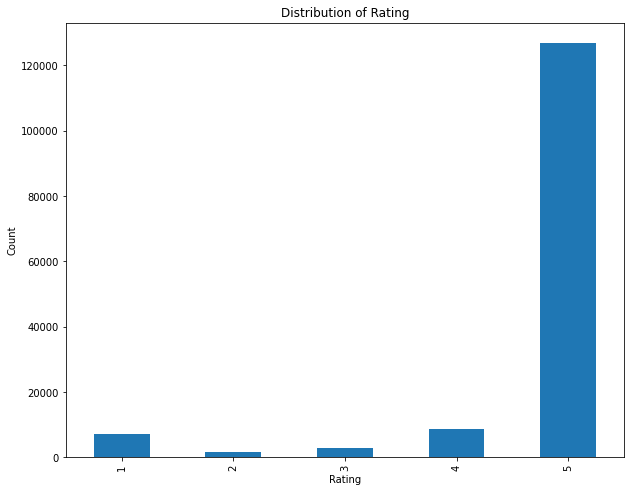

In [7]:
# Plot distribution of rating
plt.figure(figsize=(10,8))
# sns.countplot(df['Rating'])
data['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Products')

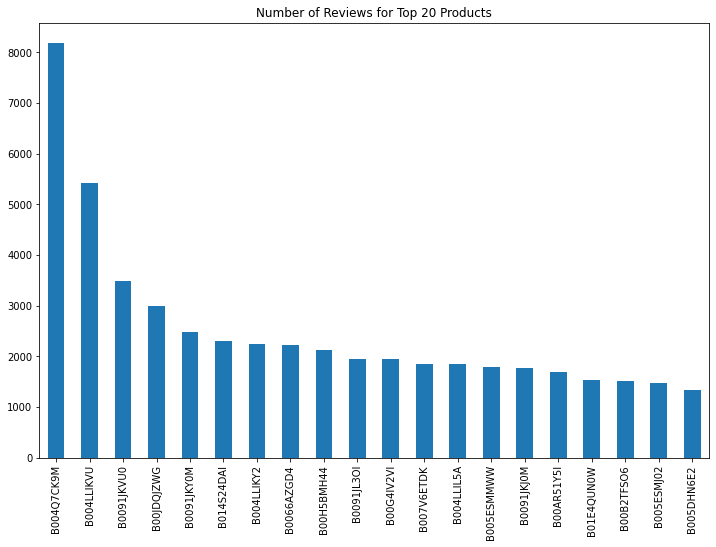

In [8]:
# Plot number of reviews for top 20 brands
brands = data["asin"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Products")

Text(0, 0.5, 'Count')

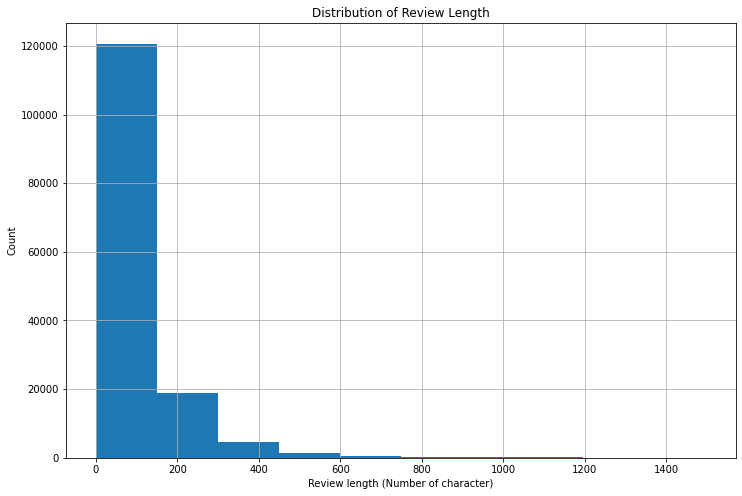

In [9]:
# Plot distribution of review length
review_length = data["reviewText"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [10]:
pos = data.loc[data['overall'] > 3]
neg = data.loc[data['overall'] < 3]

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/maruf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maruf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp['reviewText']:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [13]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

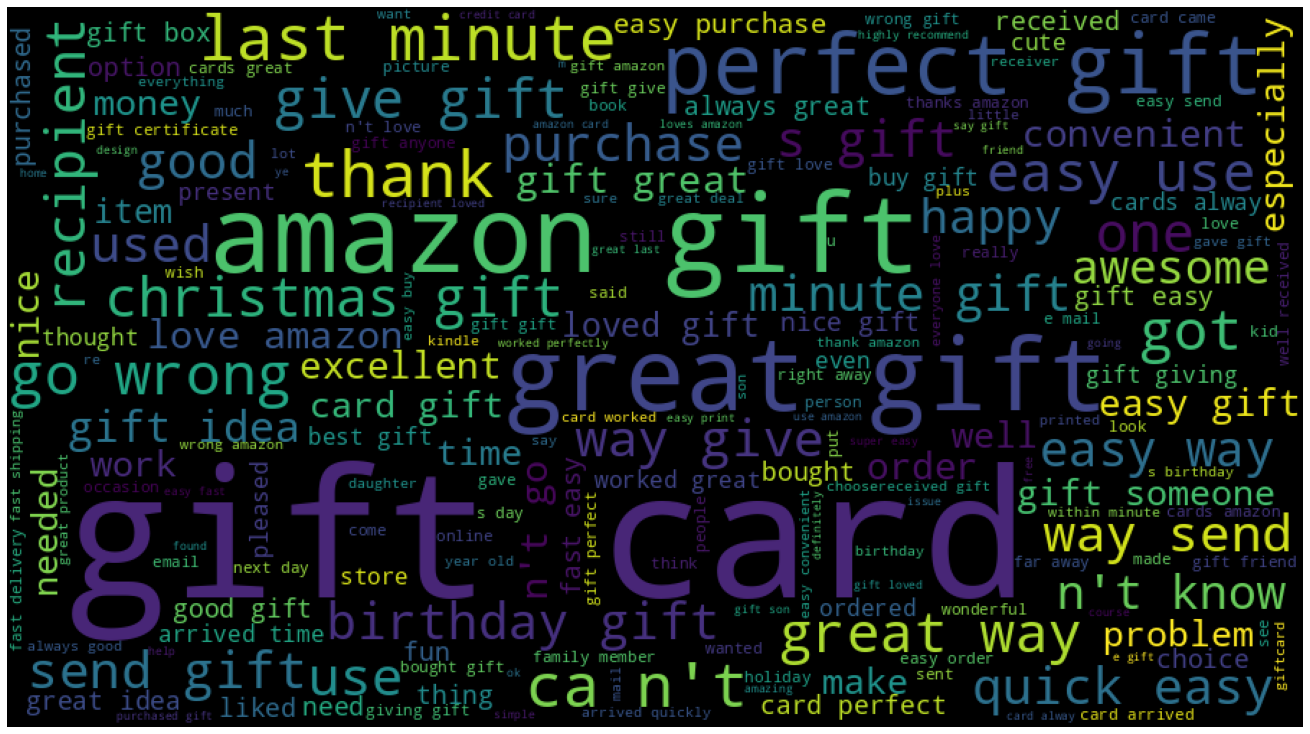

<Figure size 432x288 with 0 Axes>

In [14]:

#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

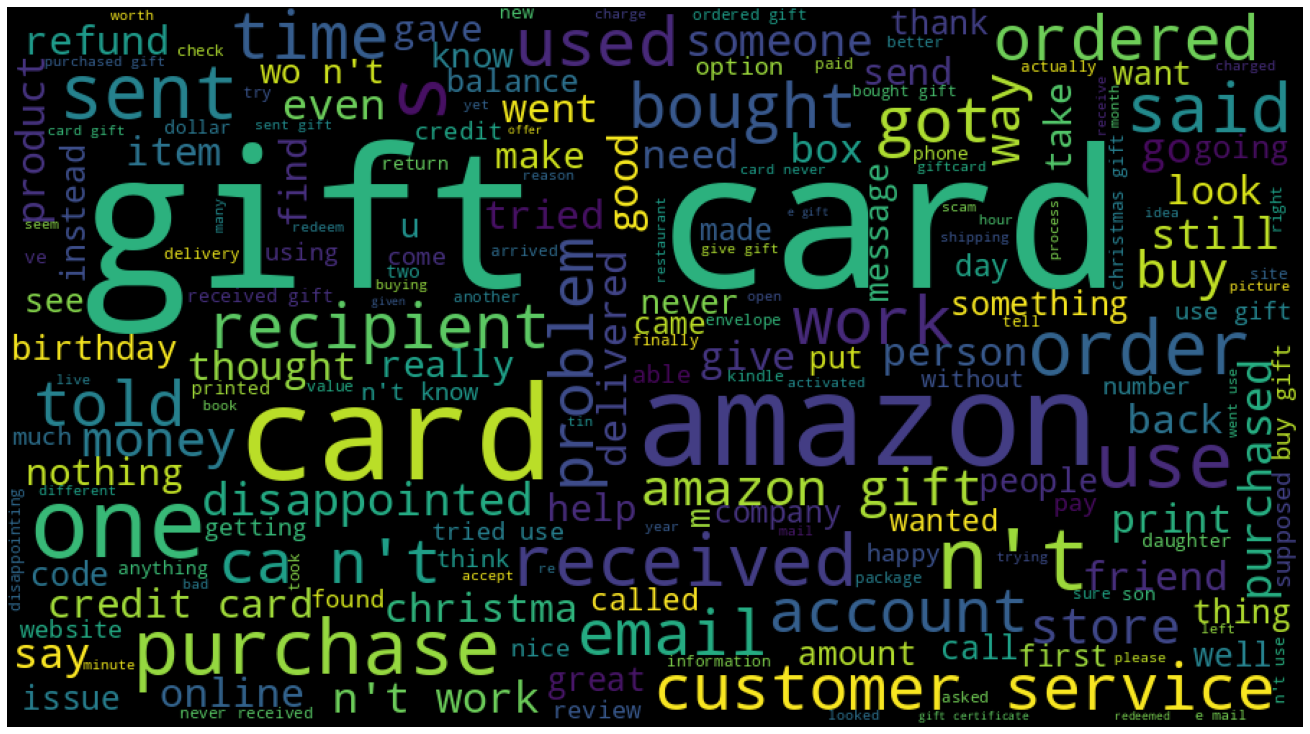

<Figure size 432x288 with 0 Axes>

In [15]:
plot_Cloud(neg_wordcloud)

In [16]:
data

overall  verified   reviewTime      reviewerID        asin  \
0             1     False  12 19, 2008   APV13CM0919JD  B001GXRQW0   
1             5     False  12 17, 2008  A3G8U1G1V082SN  B001GXRQW0   
2             5     False  12 17, 2008   A11T2Q0EVTUWP  B001GXRQW0   
3             5     False  12 17, 2008   A9YKGBH3SV22C  B001GXRQW0   
4             1      True  12 17, 2008  A34WZIHVF3OKOL  B001GXRQW0   
...         ...       ...          ...             ...         ...   
147189        5      True  09 15, 2018  A2K9WVQW9TLWNK  B01H5PPJT4   
147190        4      True   09 7, 2018  A149ALSR6TPGF7  B01H5PPJT4   
147191        5      True  08 29, 2018  A2Q066NZCQSCOR  B01H5PPJT4   
147192        5      True  08 18, 2018  A1KJLWCW7XBS8I  B01H5PPJT4   
147193        5      True  08 14, 2018   ANABUB0FRZXRM  B01H5PPJT4   

                                               reviewText  \
0       Amazon,\nI am shopping for Amazon.com gift car...   
1       I got this gift card from a friend, and it was...   
2       aren't we going to save trees?! :) People who ...   
3       You can always get someone something from Amaz...   
4       Why take 50 dollars of good money with no limi...   
...                                                   ...   
147189  I always enjoy getting these Gift cards via em...   
147190                                       Worked great   
147191                                          Gift card   
147192            What is there to say, It's a gift card.   
147193  No complaints, ordered it and within 5 or so m...   

                                                  summary  unixReviewTime  
0                                        Merry Christmas.      1229644800  
1                           Gift card with best selection      1229472000  
2       A convenient and great gift for the environmen...      1229472000  
3                                      Totally make sense      1229472000  
4                                              Give CASH!      1229472000  
...                                                   ...             ...  
147189                        Just always great service!!      1536969600  
147190                                       Good to have      1536278400  
147191                                          Gift card      1535500800  
147192                    Easy to buy and give as a gift.      1534550400  
147193                                   Gift for grandpa      1534204800  

[147194 rows x 8 columns]

In [17]:
from nltk import FreqDist
def freq_words(x, terms = 10):
  all_words = ''.join([str(text) for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 10 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

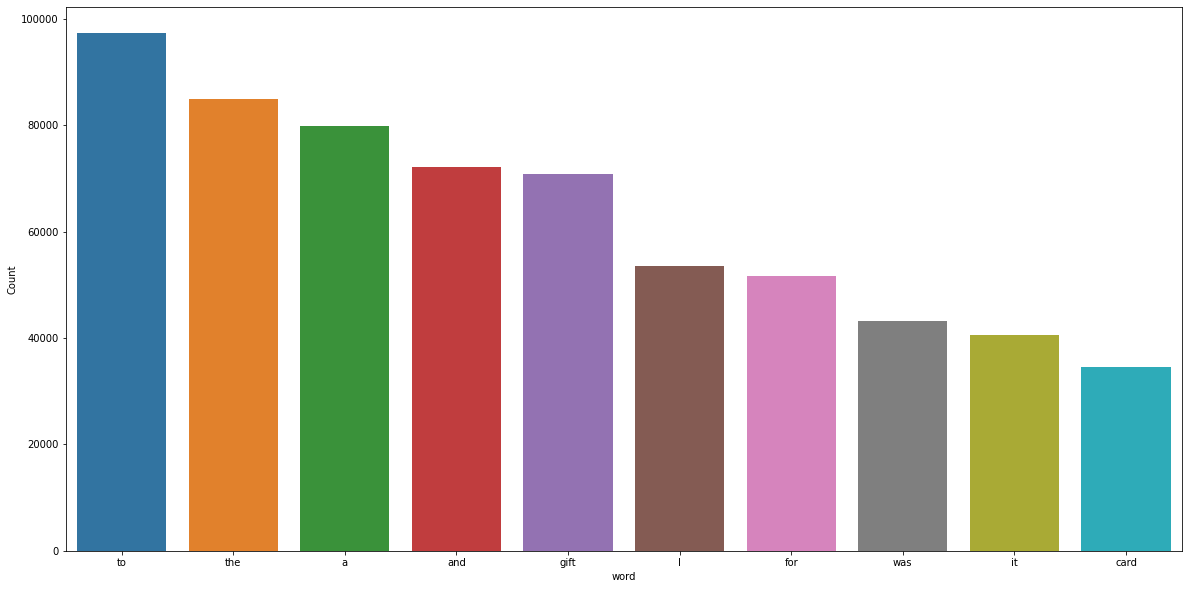

In [18]:
freq_words(data['reviewText'])

In [19]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/maruf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
def expand_constraction(text):
    for key in contractions:
        value = contractions[key]
        text = str(text).replace(key, value)
    return text
data['expand_constract'] = data['reviewText'].apply(lambda x:expand_constraction(x))

In [22]:
data['expand_constract']

0         Amazon,\nI am shopping for Amazon.com gift car...
1         I got this gift card from a friend, and it was...
2         are not / am not we going to save trees?! :) P...
3         You can always get someone something from Amaz...
4         Why take 50 dollars of good money with no limi...
                                ...                        
147189    I always enjoy getting these Gift cards via em...
147190                                         Worked great
147191                                            Gift card
147192              What is there to say, It's a gift card.
147193    No complaints, ordered it and within 5 or so m...
Name: expand_constract, Length: 147194, dtype: object

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/maruf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
def remove_newlines_tabs(text):
    formatted_text = text.replace('\\n', "").replace('\nI', " I").replace('\n',"").replace('\t',"").replace('\\', "").replace('. com', '.com').replace('.com', "").replace('!!', "").replace(':-)', "").replace('.',"").replace('!', "").replace('aaa',"").replace('aa',"a").replace('amazon',"").replace('zz',"z").replace('zzz',"z").replace('Amazon',"").replace('amazoncom',"").replace('abd',"")
    return formatted_text
data['removetabs_msg'] = data['expand_constract'].apply(lambda x:remove_newlines_tabs(x))

In [25]:
def remove_punctuation(text):
    punctuationfree = "". join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree
data['clean_msg'] = data['removetabs_msg'].apply(lambda x:remove_punctuation(x))

In [26]:
def remove_number(text):
    answer = []
    for char in text:
        if not char.isdigit():
            answer.append(char)
    return ''.join(answer)

data['no_number'] = data['clean_msg'].apply(lambda x: remove_number(x)) 

In [27]:
data['lower_msg'] = data['no_number'].apply(lambda x: x.lower())

In [28]:
# pd.set_option('display.max_rows', None)
# print(data['lower_msg'])
data['lower_msg']

0          i am shopping for  gift cards for christmas g...
1         i got this gift card from a friend and it was ...
2         are not  am not we going to save trees  people...
3         you can always get someone something from  wit...
4         why take  dollars of good money with no limita...
                                ...                        
147189    i always enjoy getting these gift cards via em...
147190                                         worked great
147191                                            gift card
147192                 what is there to say its a gift card
147193    no complaints ordered it and within  or so min...
Name: lower_msg, Length: 147194, dtype: object

In [29]:
def remove_repeatedchar(text):
    pattern = r'(.)\1{2,}'
    repl = r'\1'
    repeat = re.sub(pattern,repl,str(text))
    return repeat

data['no_repeat'] = data['lower_msg'].apply(lambda x: remove_repeatedchar(x))

woooowwwwwamaaaziiinggggggg
closetobutnotexactly
datahookproductlinklinked 
classalinknormal
datahookproductlinklinked 
classalinknormal

# look for a character followed by at least one repetition of itself.
pattern = re.compile(r"(\w)\1+")

# a function to perform the substitution we need:
def repl(text):
   char = text
   char = "%s%s" % (char, char)
   char = pattern.sub(repl, text)
   return char

data['no_repeat'] = data['lower_msg'].apply(lambda x: remove_repeatedchar(x))

from nltk.corpus import stopwords, wordnet
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
data['no_stopwords']= data['lower_msg'].apply(lambda x:remove_stopwords(x))

In [30]:
data['no_repeat']

0          i am shopping for  gift cards for christmas g...
1         i got this gift card from a friend and it was ...
2         are not  am not we going to save trees  people...
3         you can always get someone something from  wit...
4         why take  dollars of good money with no limita...
                                ...                        
147189    i always enjoy getting these gift cards via em...
147190                                         worked great
147191                                            gift card
147192                 what is there to say its a gift card
147193    no complaints ordered it and within  or so min...
Name: no_repeat, Length: 147194, dtype: object

In [31]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
data['msg_token']= data['no_repeat'].apply(lambda x: tokenization(x))

In [32]:
from nltk.corpus import stopwords, wordnet
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
data['no_stopwords']= data['msg_token'].apply(lambda x:remove_stopwords(x))

from nltk.corpus import stopwords, wordnet
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = re.split('\W+' ,text)
    filtered_sentence = [w for w in tokens if not w.lower() in stopwords]
    for w in tokens:
        if w not in stopwords:
            filtered_sentence.append(w)
    
    return filtered_sentence
data['no_stopwords']= data['no_repeat'].apply(lambda x:remove_stopwords(x))

In [33]:
def filter(text):
    filter = [w for w in text if w.isalpha()]
    return filter
data['filter']= data['no_stopwords'].apply(lambda x:filter(x))    

In [34]:
data['filter']

0         [shopping, gift, cards, christmas, gifts, real...
1         [got, gift, card, friend, best, site, much, ch...
2         [going, save, trees, people, complaining, pape...
3         [always, get, someone, something, safety, net,...
4         [take, dollars, good, money, limitations, turn...
                                ...                        
147189    [always, enjoy, getting, gift, cards, via, ema...
147190                                      [worked, great]
147191                                         [gift, card]
147192                                    [say, gift, card]
147193    [complaints, ordered, within, minutes, receive...
Name: filter, Length: 147194, dtype: object

In [35]:
data['gpos_tags'] = data['no_stopwords'].apply(nltk.tag.pos_tag)

In [36]:
data['gpos_tags']

0         [(, NN), (shopping, NN), (gift, NN), (cards, N...
1         [(got, VBD), (gift, JJ), (card, NN), (friend, ...
2         [(going, VBG), (save, JJ), (trees, NNS), (peop...
3         [(always, RB), (get, VB), (someone, NN), (some...
4         [(take, VB), (dollars, NNS), (good, JJ), (mone...
                                ...                        
147189    [(always, RB), (enjoy, VB), (getting, VBG), (g...
147190                         [(worked, VBN), (great, JJ)]
147191                             [(gift, NN), (card, NN)]
147192                  [(say, VB), (gift, NN), (card, NN)]
147193    [(complaints, NNS), (ordered, VBD), (within, I...
Name: gpos_tags, Length: 147194, dtype: object

In [37]:
def remove_postags(text):
    tags = [word for word,pos in text if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS' or pos == 'VB' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ' or pos == 'RB'or pos == 'RBR'or pos == 'RBS'or pos == 'RP')]
    return tags
data['gpos_tags'] = data['gpos_tags'].apply(lambda x:remove_postags(x))

In [38]:
data['gpos_tags']


0         [christmas, really, disappointed, says, christ...
1                                 [gift, best, much, great]
2         [going, save, complaining, simply, buy, electr...
3              [always, get, net, returning, hassle, takes]
4         [take, good, turn, used, benefitalso, spend, b...
                                ...                        
147189    [always, enjoy, getting, gift, simple, easy, e...
147190                                      [worked, great]
147191                                                   []
147192                                                [say]
147193                                  [email, containing]
Name: gpos_tags, Length: 147194, dtype: object

In [39]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['filter'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

In [40]:
data['lemmatized']

0         [shopping, gift, card, christmas, gift, really...
1         [got, gift, card, friend, best, site, much, ch...
2         [going, save, tree, people, complaining, paper...
3         [always, get, someone, something, safety, net,...
4         [take, dollar, good, money, limitation, turn, ...
                                ...                        
147189    [always, enjoy, getting, gift, card, via, emai...
147190                                      [worked, great]
147191                                         [gift, card]
147192                                    [say, gift, card]
147193    [complaint, ordered, within, minute, received,...
Name: lemmatized, Length: 147194, dtype: object

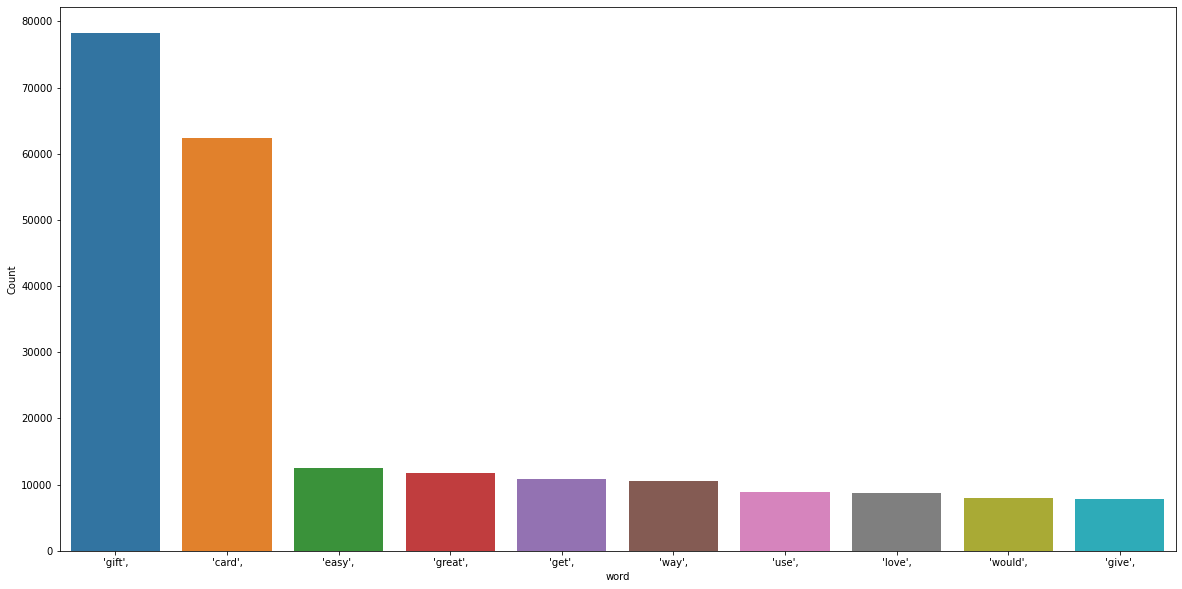

In [41]:
freq_words(data['lemmatized'])

In [42]:
data_lema = data['lemmatized']

GENISM LDA USING doc2bow

In [43]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_lema, min_count=2, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_lema], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [44]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [45]:
import spacy

data_lema = make_bigrams(data_lema)
data_lema

[['shopping',
  'gift',
  'card',
  'christmas',
  'gift',
  'really',
  'disappointed',
  'five',
  'choice',
  'one',
  'say',
  'merry',
  'christmas',
  'mention',
  'christmas',
  'sure',
  'alone',
  'wanting',
  'card',
  'reflects',
  'actual',
  'holiday',
  'celebrating',
  'principle',
  'cannot',
  'send',
  'gift',
  'card',
  'christmas',
  'whats',
  'political',
  'correctness',
  'bad',
  'marketing',
  'decisionlynn'],
 ['got',
  'gift',
  'card',
  'friend',
  'best',
  'site',
  'much',
  'choose',
  'great',
  'gift'],
 ['going',
  'save',
  'tree',
  'people',
  'complaining',
  'paper',
  'gift',
  'card',
  'simply',
  'buy',
  'electronic',
  'gift',
  'card',
  'via',
  'email',
  'convenient',
  'indeed',
  'great',
  'gift',
  'found',
  'paper',
  'gift',
  'card',
  'annoying',
  'since',
  'always',
  'wonder',
  'much',
  'money',
  'got',
  'left',
  'lose',
  'lose',
  'electronic',
  'delivery',
  'gift',
  'card',
  'make',
  'lot',
  'easier',
  're

In [46]:
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

id2word = Dictionary(data_lema)

corpus = [id2word.doc2bow(text) for text in data_lema]


In [47]:

[[(id2word[i], freq) for i, freq in doc] for doc in corpus]

[[('actual', 1),
  ('alone', 1),
  ('bad', 1),
  ('cannot', 1),
  ('card', 3),
  ('celebrating', 1),
  ('choice', 1),
  ('christmas', 4),
  ('correctness', 1),
  ('decisionlynn', 1),
  ('disappointed', 1),
  ('five', 1),
  ('gift', 3),
  ('holiday', 1),
  ('marketing', 1),
  ('mention', 1),
  ('merry', 1),
  ('one', 1),
  ('political', 1),
  ('principle', 1),
  ('really', 1),
  ('reflects', 1),
  ('say', 1),
  ('send', 1),
  ('shopping', 1),
  ('sure', 1),
  ('wanting', 1),
  ('whats', 1)],
 [('card', 1),
  ('gift', 2),
  ('best', 1),
  ('choose', 1),
  ('friend', 1),
  ('got', 1),
  ('great', 1),
  ('much', 1),
  ('site', 1)],
 [('card', 5),
  ('gift', 7),
  ('holiday', 1),
  ('friend', 1),
  ('got', 1),
  ('great', 1),
  ('much', 1),
  ('always', 1),
  ('annoying', 1),
  ('balance', 1),
  ('buy', 1),
  ('certificate', 1),
  ('code', 1),
  ('complaining', 1),
  ('convenient', 1),
  ('copypaste', 1),
  ('delivery', 1),
  ('easier', 1),
  ('electronic', 3),
  ('email', 2),
  ('found', 1

In [48]:
import gensim
# LDA for num_topics = 3
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5,passes=200, random_state=100,chunksize=100,per_word_topics=True)
lda.print_topics()

[(0,
  '0.064*"card" + 0.040*"gift" + 0.013*"time" + 0.013*"day" + 0.013*"would" + 0.013*"one" + 0.012*"received" + 0.010*"could" + 0.010*"use" + 0.009*"sent"'),
 (1,
  '0.105*"gift" + 0.051*"card" + 0.028*"perfect" + 0.028*"love" + 0.025*"loved" + 0.018*"get" + 0.015*"want" + 0.013*"buy" + 0.013*"christmas" + 0.013*"birthday"'),
 (2,
  '0.089*"easy" + 0.076*"gift" + 0.035*"card" + 0.029*"great" + 0.029*"way" + 0.025*"send" + 0.021*"fast" + 0.020*"use" + 0.018*"quick" + 0.018*"thank"'),
 (3,
  '0.061*"good" + 0.049*"nice" + 0.048*"card" + 0.041*"gift" + 0.037*"box" + 0.032*"cute" + 0.020*"tin" + 0.020*"arrived" + 0.019*"came" + 0.013*"little"'),
 (4,
  '0.097*"gift" + 0.084*"great" + 0.072*"card" + 0.021*"worked" + 0.020*"say" + 0.020*"like" + 0.013*"work" + 0.012*"love" + 0.011*"money" + 0.011*"always"')]

In [49]:
from pprint import pprint
pprint(lda.print_topics())
doc_lda = lda[corpus]


[(0,
  '0.064*"card" + 0.040*"gift" + 0.013*"time" + 0.013*"day" + 0.013*"would" + '
  '0.013*"one" + 0.012*"received" + 0.010*"could" + 0.010*"use" + '
  '0.009*"sent"'),
 (1,
  '0.105*"gift" + 0.051*"card" + 0.028*"perfect" + 0.028*"love" + '
  '0.025*"loved" + 0.018*"get" + 0.015*"want" + 0.013*"buy" + '
  '0.013*"christmas" + 0.013*"birthday"'),
 (2,
  '0.089*"easy" + 0.076*"gift" + 0.035*"card" + 0.029*"great" + 0.029*"way" + '
  '0.025*"send" + 0.021*"fast" + 0.020*"use" + 0.018*"quick" + 0.018*"thank"'),
 (3,
  '0.061*"good" + 0.049*"nice" + 0.048*"card" + 0.041*"gift" + 0.037*"box" + '
  '0.032*"cute" + 0.020*"tin" + 0.020*"arrived" + 0.019*"came" + '
  '0.013*"little"'),
 (4,
  '0.097*"gift" + 0.084*"great" + 0.072*"card" + 0.021*"worked" + 0.020*"say" '
  '+ 0.020*"like" + 0.013*"work" + 0.012*"love" + 0.011*"money" + '
  '0.011*"always"')]


In [50]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,3), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=data_lema)

In [51]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0               0.389   
1            1             1.0               0.925   
2            2             0.0               0.567   
3            3             1.0               0.670   
4            4             4.0               0.599   
5            5             0.0               0.691   
6            6             0.0               0.600   
7            7             0.0               0.954   
8            8             0.0               0.445   
9            9             0.0               0.686   

                                            Keywords  \
0  card, gift, time, day, would, one, received, c...   
1  gift, card, perfect, love, loved, get, want, b...   
2  card, gift, time, day, would, one, received, c...   
3  gift, card, perfect, love, loved, get, want, b...   
4  gift, great, card, worked, say, like, work, lo...   
5  card, gift, time, day, would, one, received, c...   
6  card, gift, time, day, would, one, received, c...   
7  card, gift, time, day, would, one, received, c...   
8  card, gift, time, day, would, one, received, c...   
9  card, gift, time, day, would, one, received, c...   

                                                Text  
0  [shopping, gift, card, christmas, gift, really...  
1  [got, gift, card, friend, best, site, much, ch...  
2  [going, save, tree, people, complaining, paper...  
3  [always, get, someone, something, safety, net,...  
4  [take, dollar, good, money, limitation, turn, ...  
5  [gift, card, truly, personal, gift, problem, r...  
6  [dedicated_shopper, almost, always, happy, sai...  
7  [bought, three, gift, card, gift, received, ma...  
8  [time, year, gift, card, turning, best, gift, ...  
9  [bought, gift, card, give, present, totally, s...

In [52]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0               0.989   
1        1.0               0.979   
2        2.0               0.993   
3        3.0               0.987   
4        4.0               0.964   

                                                                Keywords  \
0          card, gift, time, day, would, one, received, could, use, sent   
1  gift, card, perfect, love, loved, get, want, buy, christmas, birthday   
2            easy, gift, card, great, way, send, fast, use, quick, thank   
3          good, nice, card, gift, box, cute, tin, arrived, came, little   
4        gift, great, card, worked, say, like, work, love, money, always   

                                                                                   Representative Text  
0  [father, ordered, gift, certificate, february, used, gift, certificate, since, screwed, sent, co...  
1  [love, getting, gift, card, family, nephew, getting, older, always, odds, give, birthday, give, ...  
2  [hate_fill, survey_twelve, wordsjust, hate_fill, survey_twelve, hate_fill, survey_twelve, hate_f...  
3  [siempre_ha, parecido, que, una, gift, card, e_un, excelente, regalo, se, la, di, mi, hija, ella...  
4  [bought, gift, card, holiday_season, wish, would, run, special, like, company, spend, much, gift...

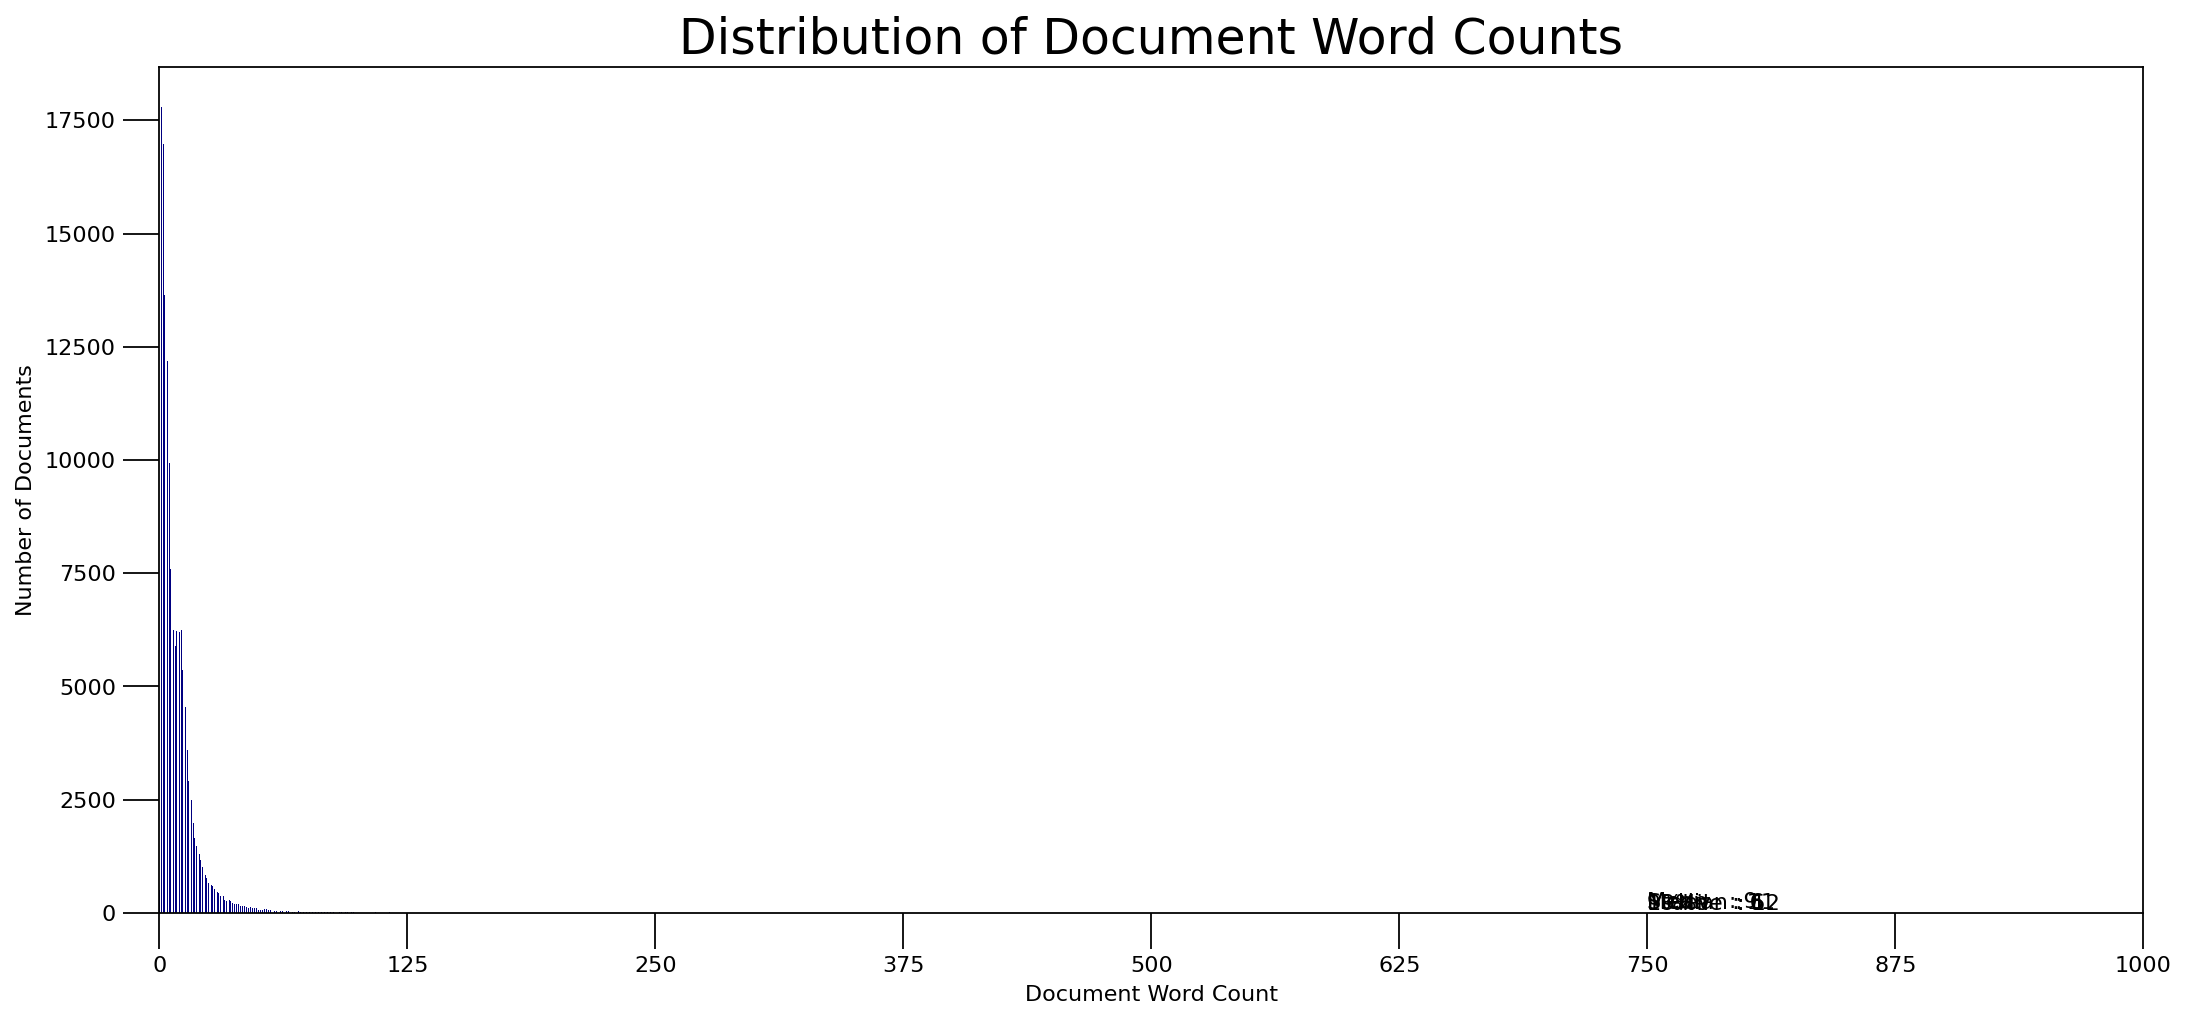

In [53]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

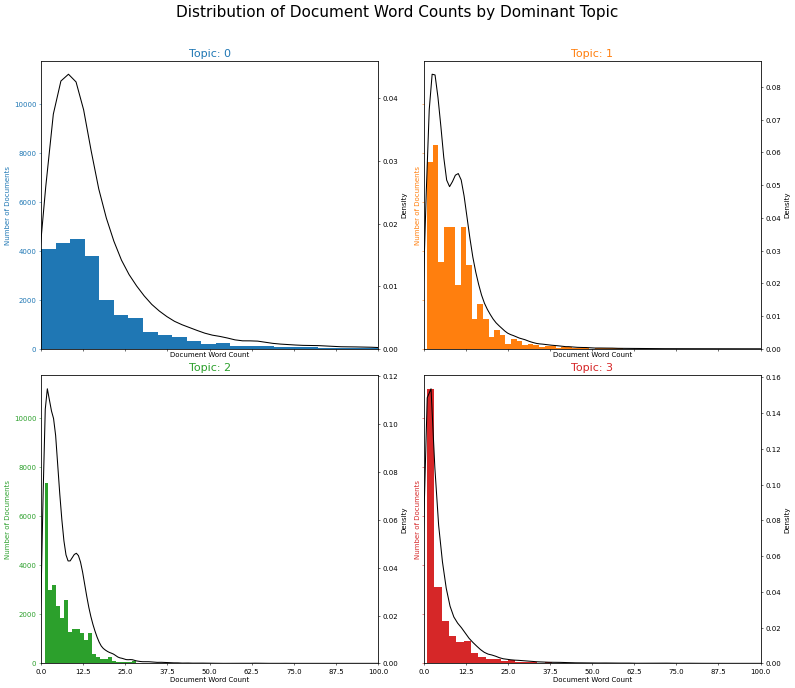

In [54]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=50, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

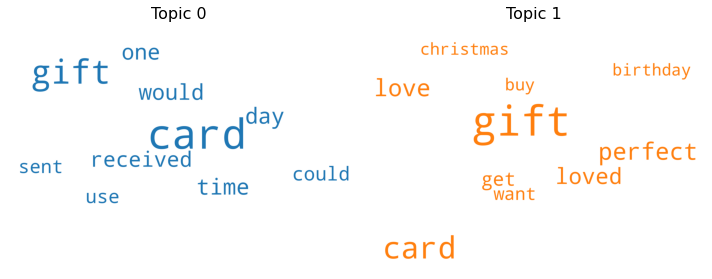

In [55]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [56]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lema, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5351053755637354
